<a href="https://colab.research.google.com/github/jnramirezg/medio_continuo/blob/main/codigo/16-(3_4_2)-ejemplo_cambio_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16. Ejemplo de cambio de base (sección 3.4.2)

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | 2022-07-16 | Conversión de código de MAXIMA a Python|
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | 2022-09-24 | Adecuando código|

Importamos de la librería ```numpy``` para cálculos numéricos, algunas funciones:

In [1]:
from numpy.linalg import norm
from numpy import array, cross, transpose

Definimos una función que convierta vectores a vectores unitarios.
$$\underline{\hat{v}} = \frac{\underline{v}}{||\underline{v}||}$$

En Python ```lambda``` define funciones, y usamos la función ```numpy.linalg.norm()``` para calcular la norma del vector.

In [2]:
vector_unitario = lambda x : x/norm(x)

Calculamos los vectores $\hat{\underline{e}}_1'$, $\hat{\underline{e}}_2'$, $\hat{\underline{e}}_3'$:

In [3]:
e1gp = vector_unitario([-3, -4, 2])
e1gp

array([-0.55708601, -0.74278135,  0.37139068])

In [4]:
e3gp = vector_unitario([ 2,  1, 5])
e3gp

array([0.36514837, 0.18257419, 0.91287093])

Tenemos en cuenta que: 

$$\hat{\underline{e}}_2' = \hat{\underline{e}}_3'\times\hat{\underline{e}}_1' = -\hat{\underline{e}}_1'\times\hat{\underline{e}}_3'$$

In [5]:
e2gp = cross(e3gp, e1gp)
e2gp

array([ 0.74586985, -0.64416033, -0.16951588])

Definimos la matriz de transformación $\underline{\underline{\boldsymbol{T}}}$:

$\underline{\underline{\boldsymbol{T}}} = [\hat{\underline{e}}_1, \hat{\underline{e}}_2, \hat{\underline{e}}_3]$

Recordemos que se forma con los vectores columna, ```numpy``` los trabaja como vectores fila, así que debo trasnponer la matriz:

In [6]:
T = transpose(array([e1gp, e2gp, e3gp ]))
T

array([[-0.55708601,  0.74586985,  0.36514837],
       [-0.74278135, -0.64416033,  0.18257419],
       [ 0.37139068, -0.16951588,  0.91287093]])

Determinamos las deformaciones $\varepsilon_x'$, $\varepsilon_y'$ y $\varepsilon_{x'y'}$ a partir de la lectura de las galgas, utilizando las ecuaciones:

$\varepsilon_{x} = \varepsilon_{A}$

$\varepsilon_{y} = \varepsilon_{C}$

$\varepsilon_{xy} = \varepsilon_{B}-\frac{\varepsilon_{A}+\varepsilon_{C}}{2}$

![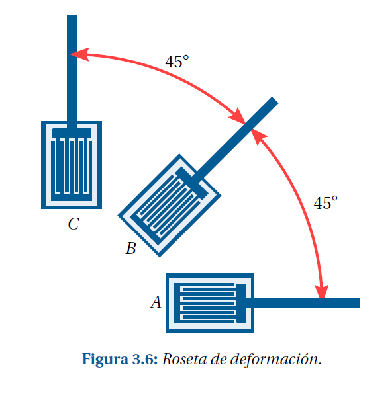](attachment:imagen-3.png)
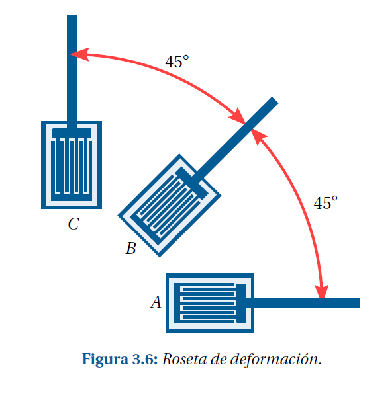

In [7]:
eA =    1e-3;  e_xp   = eA
eC = -1.7e-3;  e_yp   = eC 
eB =  2.1e-3;  e_xpyp = eB - (eA + eC)/2

Definimos la matriz de deformaciones $\underline{\underline{\boldsymbol{\varepsilon'}}}$ en $x'$, $y'$, $z'$:

In [8]:
epsilonP = array([[  e_xp, e_xpyp, 0],
                  [e_xpyp,   e_yp, 0],
                  [     0,      0, 0]])

Definimos la matriz de deformaciones $\underline{\underline{\boldsymbol{\varepsilon}}}$ en $x$, $y$, $z$, mediante:
$$\underline{\underline{\boldsymbol{\varepsilon}}} = \underline{\underline{\boldsymbol{T}}}\underline{\underline{\boldsymbol{\varepsilon'}}}\underline{\underline{\boldsymbol{T}}}^T$$

In [9]:
epsilon = T @ epsilonP @transpose(T)
epsilon

array([[-0.00267142,  0.00075242,  0.00091808],
       [ 0.00075242,  0.00219083, -0.00073913],
       [ 0.00091808, -0.00073913, -0.00021941]])

De donde se deduce que: 

$\varepsilon_x=-2.6714\cdot10^{-3}$, $\varepsilon_y=2.1908\cdot10^{-3}$, $\varepsilon_z=-2.1941\cdot10^{-4}$,

$\varepsilon_{xy}=7.5242\cdot10^{-4}$, $\varepsilon_{xz}=9.1808\cdot10^{-4}$, $\varepsilon_{yz}=-7.3913\cdot10^{-4}$